# Table of contents

* [Customer analysis](#Customer-analysis)
* [Understanding RFM Segmentation](#Understanding-RFM-Segmentation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Customer segmentation with RFM](#Customer-segmentation-with-RFM)
* [Clustering / RFM Score](#Clustering---RFM-Score)
* [Working with cohorts](#Working-with-cohorts)

# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

Recensy / Frequency / Monetary

❓ Can you summarize what each metric measures in one sentence?

- Recensy : last customer interaction (visit, purchase)<br>
- Frequency: purchase (or visit) over a given period of time<br>
- Monetary : amount of the customer's purchases (total, per period, ...) 

❓ What data / or type of data do you need for each metric ? 

- Recensy : order_purchase_timestamp / customer_unique_id <br>
- Frequency : order_id / customer_unique_id / order_purchase_timestamp<br>
- Monetary : payment_value / customer_unique_id / order_purchase_timestamp<br>

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [140]:
import numpy as np
import pandas as pd
from operator import attrgetter

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import squarify
import matplotlib.colors as mcolors

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv('db_customers.csv')
df.head(5)

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [23]:
df['customer_unique_id'].value_counts()

9a736b248f67d166d2fbb006bcb877c3    54
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
db1af3fd6b23ac3873ef02619d548f9c    24
1d2435aa3b858d45c707c9fc25e18779    24
                                    ..
e50569b62165a28a0ae455cc3654d277     1
f2f850bf414ea87b12ddcd13a910bd68     1
bd07a7b3f902d6f2cfb02eb03fec8372     1
c437f78e91112d9dc120311a783aff58     1
937f16b584dd395ce455ef468322b27f     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [24]:
# basic informations about dataset (numbers of rows, columns)
df.shape

(105383, 13)

❓ Which features should be formated in datetime ? 
Convert them

In [27]:
# recency / convert in datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)

❓ Which features are Categorical ? List the unique values on these features.

In [28]:
# see values on categoricals features
df['payment_type'].unique()
df['customer_city'].unique()
df['customer_state'].unique()
df['product_category_name_english'].unique()
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

❓ Check for missing values. What do you notice ? 


In [30]:
# sum of NaN
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

3159 orders not delivered / 1 order unpaid

❓ What are the proportions of each `order_status` ? 

In [32]:
df['order_status'].value_counts(normalize=True)

delivered      0.970033
shipped        0.011197
canceled       0.006348
unavailable    0.006177
invoiced       0.003131
processing     0.003046
created        0.000047
approved       0.000019
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

canceled, unavailable, invoiced, processing, created, approved

In [33]:
# keep just delivered & shipped status
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

# Customer segmentation with RFM

❓ What feature would you choose in the e-commerce dataset provided? 

In [96]:
df_RFM = df[['customer_unique_id','order_id', 'order_purchase_timestamp']]

❓ What method would you use to group the data? 

groupby or agg.

❓ What feature would you use to group the data? 

customer_unique_id

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [97]:
date_min = df['order_purchase_timestamp'].min()
date_min

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [98]:
date_max = df['order_purchase_timestamp'].max()
date_max

Timestamp('2018-09-03 09:06:57')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [99]:
recens_date = df['order_purchase_timestamp'].max() + timedelta(days=1)
recens_date

Timestamp('2018-09-04 09:06:57')

In [100]:
# groupby for the recency 
recency_df = df.groupby(['customer_unique_id'],as_index=False)['order_purchase_timestamp'].max()
# rename columns
recency_df.columns = ['CustomerID', 'LastOrder']
recency_df.head()

,CustomerID,LastOrder
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [101]:
# add columns recency to dataset
recency_df['Recency'] = recency_df.LastOrder.apply(lambda x : (recens_date - x).days)
recency_df.head()

,CustomerID,LastOrder,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


In [102]:
# groupby for the frequency
freq_df = df_RFM.copy()
freq_df = df.groupby(['customer_unique_id'],as_index=False)['order_id'].count()
# rename columns
freq_df.columns = ['CustomerID', 'Frequency']
freq_df

,CustomerID,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,1
94395,fffea47cd6d3cc0a88bd621562a9d061,1
94396,ffff371b4d645b6ecea244b27531430a,1
94397,ffff5962728ec6157033ef9805bacc48,1


In [103]:
freq_df['Frequency'].value_counts()

1     88115
2      4990
3       765
4       279
5        85
6        68
7        32
8        14
9        10
11        7
12        7
10        6
13        4
14        3
15        3
24        3
19        2
16        1
22        1
23        1
26        1
29        1
54        1
Name: Frequency, dtype: int64

In [104]:
# groupby for the montant
montant_df=df.groupby('customer_unique_id',as_index=False)['payment_value'].sum()
# rename columns
montant_df.columns = ['CustomerID','Monetary']
montant_df

,CustomerID,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,84.58
94396,ffff371b4d645b6ecea244b27531430a,112.46
94397,ffff5962728ec6157033ef9805bacc48,133.69


In [105]:
# merge recency_df + freq_df
df_merge1 = recency_df.merge(freq_df,left_on='CustomerID',right_on='CustomerID')
# merge df_merge1 + montant_df
super_data = df_merge1.merge(montant_df,left_on='CustomerID',right_on='CustomerID')

In [106]:
# tadaaaaaaaaaaaaaaaam !
super_data

,CustomerID,LastOrder,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89
...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,452,1,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,267,1,84.58
94396,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,573,1,112.46
94397,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,124,1,133.69


# Clustering - RFM Score

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

R = Recensy<br>
F = Frequency<br>
M = Monetary

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [87]:
super_data.describe([0.20]).T

,count,mean,std,min,20%,50%,max
Recency,94399.0,242.864162,152.723176,1.0,97.00,224.0,729.00
Frequency,94399.0,1.095404,0.530304,1.0,1.00,1.0,54.00
Monetary,94399.0,168.250134,232.880460,0.0,55.37,108.1,13664.08


In [107]:
#Cluster RFM SCORE

# Recency
super_data["R"] = [1 if x > 270  else 2 for x in super_data['Recency']]

# Frequency
super_data["F"] = [2 if x > 1  else 1 for x in super_data['Frequency']]

# Monetary
def m_score (x):
    if x <= super_data['Monetary'][200]:
        return 3
    elif x <= super_data['Monetary'][100]:
        return 2
    else:
        return 1

super_data['M'] = super_data['Monetary'].apply(lambda x: m_score(x))

In [108]:
# add columns with score R F M
super_data['RFM Score'] = super_data['R'].map(str) + super_data['F'].map(str) + super_data['M'].map(str)
super_data.head()

,CustomerID,LastOrder,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,141.90,2,1,1,211
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,27.19,2,1,3,213
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,86.22,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62,1,1,3,113
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89,1,1,1,111


In [90]:
super_data['RFM Score'].value_counts()

211    38155
111    26072
213    14160
113     9728
221     3247
121     2221
223      441
123      375
Name: RFM Score, dtype: int64

In [109]:
# define clients status according to the RFM Score
def categ(x):
    if x in["111", "112", "113"]:
        return "Lost"
    elif x in["221", "222"]:
         return "Fidèle"
    elif x in["123", "223"]:
        return "Premium"
    else:
        return "Lambda"

In [110]:
# make dataframe with "Customer Status" column
super_data['Customer Status'] = super_data['RFM Score'].apply(categ)
super_data.head()

,CustomerID,LastOrder,Recency,Frequency,Monetary,R,F,M,RFM Score,Customer Status
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,141.90,2,1,1,211,Lambda
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,27.19,2,1,3,213,Lambda
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,86.22,1,1,1,111,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62,1,1,3,113,Lost
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89,1,1,1,111,Lost


In [112]:
super_data['Customer Status'].value_counts(normalize=True)

Lambda     0.577718
Lost       0.379241
Fidèle     0.034397
Premium    0.008644
Name: Customer Status, dtype: float64

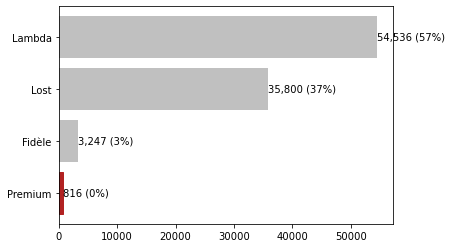

In [114]:
# customers in each status
categ_counts = super_data['Customer Status'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(categ_counts)),
              categ_counts,
              color='silver')
ax.set_yticks(range(len(categ_counts)))
ax.set_yticklabels(categ_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if categ_counts.index[i] in ['Premium']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/categ_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

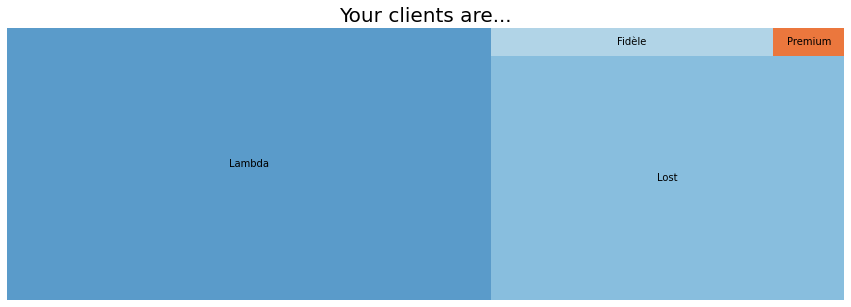

In [119]:
# visualisation squarify
y = super_data['Customer Status'].value_counts()
plt.rcParams['figure.figsize'] = (15, 5)
color = plt.cm.tab20c(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Your clients are...', fontsize = 20)
plt.axis('off')
plt.show()

# Working with cohorts

❓What is a cohort? 

A cohort represents a group of a population which shares something in common within a specified period

❓Why is it interesting to analyse cohorts ? 

It helps to analyze the customers

❓What data (already existing in the original dataset) do we need to build a cohort? 

- order_purchase_timestamp<br>
- order_id<br>
- customer_unique_id<br>

Build a new df with just these 3 features

In [144]:
df_cohort = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [145]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)

In [146]:
df_cohort['order_time_month'] = df_cohort['order_purchase_timestamp'].dt.to_period('M')

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [147]:
df_cohort['cohort'] = df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M') 

In [148]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_cohort.groupby('customer_unique_id').size()[df_cohort.groupby('customer_unique_id').size() > 1])
df_cohort = df_cohort.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_cohort = df_cohort[df_cohort['na'].notna()]

In [149]:
df_cohort.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month,cohort,na
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,2017-09,2.0
14,ccafc1c3f270410521c3c6f3b249870f,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,2018-06,2016-10,2.0
15,6e26bbeaa107ec34112c64e1ee31c0f5,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43,2018-01,2017-07,2.0
43,08fb46d35bb3ab4037202c23592d1259,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,2018-06,2018-06,2.0
45,c2551ea089b7ebbc67a2ea8757152514,d17dc4a904426827ca80f2ccb3a6be56,2017-05-14 20:28:25,2017-05,2017-05,2.0


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [150]:
df_c = df_cohort.groupby(['cohort', 'order_time_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [152]:
df_c['period_number'] = (df_c.order_time_month - df_c.cohort).apply(attrgetter('n'))

Explore a cohort (for example 2017-01) and try to understand what it shows

In [153]:
view = df_c[df_c["cohort"] == '2017-01']
view

,cohort,order_time_month,n_customers,period_number
11,2017-01,2017-01,55,0
12,2017-01,2017-02,3,1
13,2017-01,2017-03,2,2
14,2017-01,2017-04,1,3
15,2017-01,2017-05,3,4
16,2017-01,2017-06,1,5
17,2017-01,2017-07,3,6
18,2017-01,2017-08,1,7
19,2017-01,2017-09,1,8
20,2017-01,2017-11,3,10


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [154]:
cohort_piv = df_c.pivot_table(index = 'cohort', columns = 'period_number',values = 'n_customers')

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [155]:
cohort_size = cohort_piv.iloc[:,0]
retention_matrix = cohort_piv.divide(cohort_size, axis = 0)

In [156]:
df_c.head()

,cohort,order_time_month,n_customers,period_number
0,2016-10,2016-10,12,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13


Plot your `retention matrix` using the code below : 

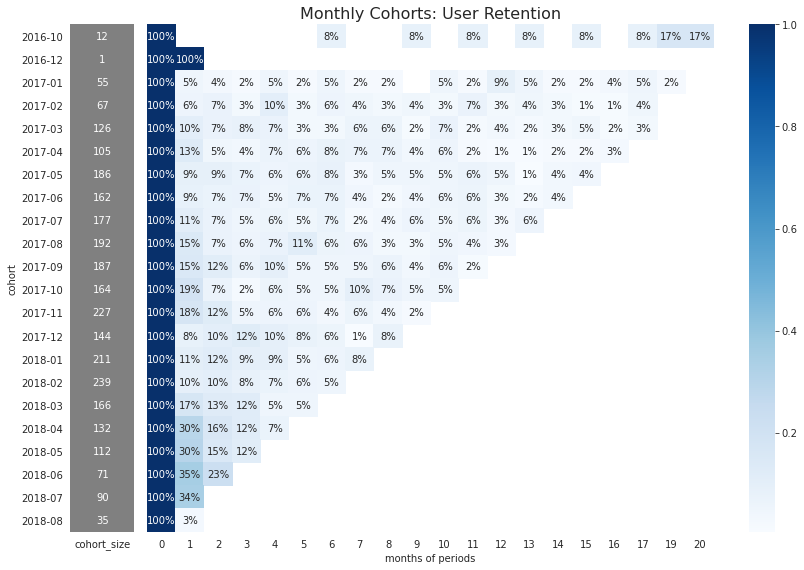

In [160]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='Blues', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='months of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

The retention matrix is with the customers that have done 2 or more purchases so little percent of the total of customers.<br>
From 04/2018, there is a clear increase over period 1. 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [161]:
n_orders = df.groupby(['customer_unique_id'])['order_id'].nunique()
orders_perc2 = np.sum(n_orders > 1) / df['customer_unique_id'].nunique()
# 3,12% of customers have ordered more than once
orders_perc2*100

3.0307524444114877